<h1>Notebook<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Scénario" data-toc-modified-id="Scénario-1">Scénario</a></span></li><li><span><a href="#Mission" data-toc-modified-id="Mission-2">Mission</a></span></li><li><span><a href="#Partie-2:-Analyses" data-toc-modified-id="Partie-2:-Analyses-3">Partie 2: Analyses</a></span><ul class="toc-item"><li><span><a href="#Répartition-des-pays" data-toc-modified-id="Répartition-des-pays-3.1">Répartition des pays</a></span><ul class="toc-item"><li><span><a href="#les-pays-exportateurs-de-viandes-de-volailles" data-toc-modified-id="les-pays-exportateurs-de-viandes-de-volailles-3.1.1">les pays exportateurs de viandes de volailles</a></span></li><li><span><a href="#Les-pays-importateurs-de-viandes-de-volailles" data-toc-modified-id="Les-pays-importateurs-de-viandes-de-volailles-3.1.2">Les pays importateurs de viandes de volailles</a></span></li><li><span><a href="#Les-pays-producteurs-de-viandes-de-volailles" data-toc-modified-id="Les-pays-producteurs-de-viandes-de-volailles-3.1.3">Les pays producteurs de viandes de volailles</a></span></li><li><span><a href="#Les-pays-consommateurs-de-viandes-de-volailles" data-toc-modified-id="Les-pays-consommateurs-de-viandes-de-volailles-3.1.4">Les pays consommateurs de viandes de volailles</a></span></li></ul></li><li><span><a href="#Corrélation-entre-features" data-toc-modified-id="Corrélation-entre-features-3.2">Corrélation entre features</a></span></li><li><span><a href="#Classification-ascendante-hiérarchique" data-toc-modified-id="Classification-ascendante-hiérarchique-3.3">Classification ascendante hiérarchique</a></span><ul class="toc-item"><li><span><a href="#Réaliser-un-clustering-hiérarchique" data-toc-modified-id="Réaliser-un-clustering-hiérarchique-3.3.1">Réaliser un clustering hiérarchique</a></span></li><li><span><a href="#Centroides" data-toc-modified-id="Centroides-3.3.2">Centroides</a></span></li><li><span><a href="#Visualisation-cluster" data-toc-modified-id="Visualisation-cluster-3.3.3">Visualisation cluster</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-3.3.4">Heatmap</a></span></li></ul></li><li><span><a href="#Algorithme-du-K-means" data-toc-modified-id="Algorithme-du-K-means-3.4">Algorithme du K-means</a></span><ul class="toc-item"><li><span><a href="#Tests-de-normalité" data-toc-modified-id="Tests-de-normalité-3.4.1">Tests de normalité</a></span></li><li><span><a href="#Transformation-yeo-johnson" data-toc-modified-id="Transformation-yeo-johnson-3.4.2">Transformation yeo-johnson</a></span></li><li><span><a href="#K-value" data-toc-modified-id="K-value-3.4.3">K value</a></span></li><li><span><a href="#Centroides" data-toc-modified-id="Centroides-3.4.4">Centroides</a></span></li><li><span><a href="#Visualisation-cluster" data-toc-modified-id="Visualisation-cluster-3.4.5">Visualisation cluster</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-3.4.6">Heatmap</a></span></li></ul></li><li><span><a href="#Analyse-en-Composante-Principale-(ACP)" data-toc-modified-id="Analyse-en-Composante-Principale-(ACP)-3.5">Analyse en Composante Principale (ACP)</a></span><ul class="toc-item"><li><span><a href="#Diagramme-éboulis-des-valeurs-propres" data-toc-modified-id="Diagramme-éboulis-des-valeurs-propres-3.5.1">Diagramme éboulis des valeurs propres</a></span></li><li><span><a href="#Analyse-PCA-1-&amp;-PCA2" data-toc-modified-id="Analyse-PCA-1-&amp;-PCA2-3.5.2">Analyse PCA 1 &amp; PCA2</a></span></li><li><span><a href="#Analyse-PCA-3-&amp;-PCA-4" data-toc-modified-id="Analyse-PCA-3-&amp;-PCA-4-3.5.3">Analyse PCA 3 &amp; PCA 4</a></span></li><li><span><a href="#Analyse-PCA-1-PCA2-et-PCA3" data-toc-modified-id="Analyse-PCA-1-PCA2-et-PCA3-3.5.4">Analyse PCA 1 PCA2 et PCA3</a></span></li><li><span><a href="#Analyse-non-parametique-(Kruskal-Wallis)" data-toc-modified-id="Analyse-non-parametique-(Kruskal-Wallis)-3.5.5">Analyse non parametique (Kruskal-Wallis)</a></span></li></ul></li></ul></li></ul></div>

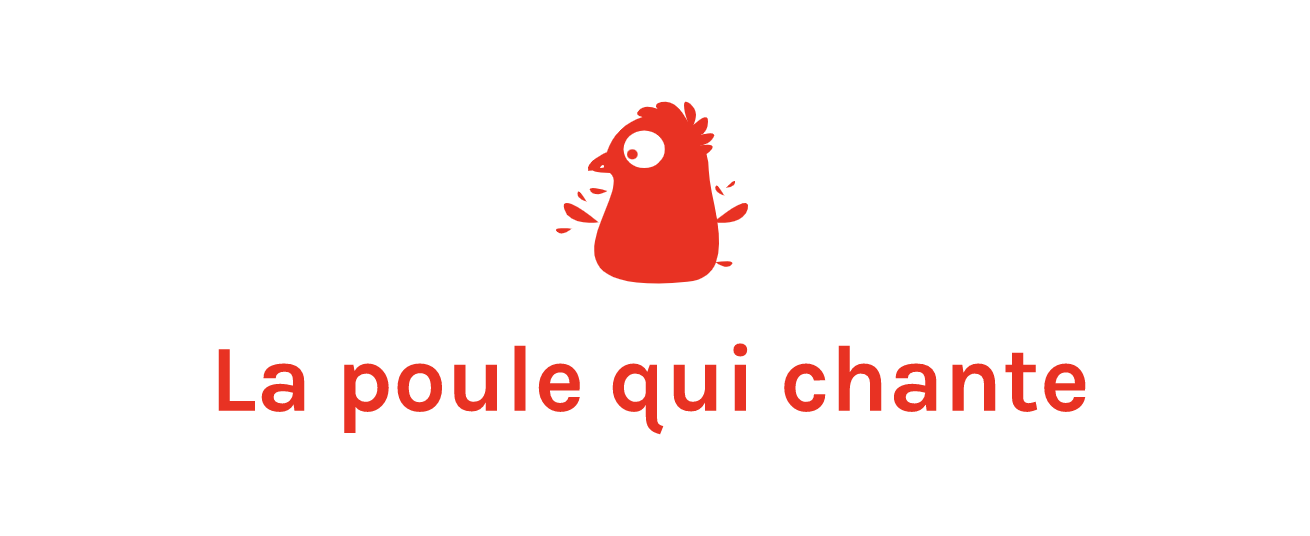

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import numpy as np
import plotly.express as px
import pylab
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pca
from pca import pca
from sklearn import preprocessing, cluster, metrics, decomposition
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from scipy.stats import norm
import scipy.stats as st
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import boxcox
%matplotlib inline

# Scénario
Vous travaillez chez La poule qui chante, une entreprise française d’agroalimentaire. Elle souhaite se développer à l'international.

# Mission
Pars des données de la FAO (Food and Agriculture Organization) que je te mets en pièce jointe pour faire ton analyse. Si tu veux aller plus loin, notamment avec les critères de l’analyse PESTEL, tu peux récupérer et utiliser toutes les données en open data que tu souhaites sur le site de la FAO.

Pour la partie analyse, dans un premier temps j’aimerais que tu testes la classification ascendante hiérarchique, avec un dendrogramme comme visualisation. Ensuite tu pourras utiliser la méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering. N'hésite pas à prendre le temps d’analyser les centroïdes de tes classes. Tu peux également réaliser une ACP afin de visualiser les résultats de ton analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus...

In [2]:
# import du fichier
df_all_items = pd.read_csv("data_export_volailles.csv")

In [3]:
df_all_items = df_all_items.drop("Unnamed: 0", axis=1)

# Partie 2: Analyses

## Répartition des pays

### les pays exportateurs de viandes de volailles

In [4]:
# les plus gros exportateurs de viandes de volailles
df_all_items.sort_values(by='Export viandes Volailles',
                         ascending=False, inplace=True)
df_all_items.head(10)

Code ISO        Zone  Population 2017  \
23       BRA      Brésil     2.078338e+08   
51       USA  États-Unis     3.250848e+08   
121      NLD    Pays-Bas     1.702135e+07   
124      POL     Pologne     3.795318e+07   
148      THA   Thaïlande     6.920981e+07   
68       HKG   Hong Kong     7.306322e+06   
17       BEL    Belgique     1.141975e+07   
4        DEU   Allemagne     8.265841e+07   
32       CHN       Chine     1.421022e+09   
55       FRA      France     6.484251e+07   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
23                                  18.90                      -0.42   
51                                  15.40                       0.34   
121                                  6.88                       0.92   
124                                 -1.57                       0.52   
148                                  9.94                      -0.75   
68                                  10.60                       0.83   
17                                  11.07                       0.43   
4                                    1.54                       0.59   
32                                  10.11                       0.00   
55                                   9.87                       0.28   

     PIB par habitant  Export viandes Volailles  \
23            14524.6                    4223.0   
51            60109.7                    3692.0   
121           55088.6                    1418.0   
124           30064.5                    1025.0   
148           17423.0                     796.0   
68            59849.2                     663.0   
17            50442.3                     656.0   
4             52952.9                     646.0   
32            14621.2                     576.0   
55            44577.1                     501.0   

     % Export viandes vs total aliments  \
23                                 4.70   
51                                 3.66   
121                                5.82   
124                                9.85   
148                                1.28   
68                                23.14   
17                                 5.41   
4                                  6.17   
32                                 2.22   
55                                 2.25   

     % Export viandes Volailles vs total aliments  \
23                                           2.74   
51                                           1.78   
121                                          2.41   
124                                          4.30   
148                                          1.18   
68                                          18.37   
17                                           2.02   
4                                            1.10   
32                                           1.43   
55                                           0.84   

     % Export viandes Volailles vs total viandes  ...  \
23                                         58.43  ...   
51                                         48.68  ...   
121                                        41.37  ...   
124                                        43.71  ...   
148                                        92.34  ...   
68                                         79.40  ...   
17                                         37.38  ...   
4                                          17.81  ...   
32                                         64.43  ...   
55                                         37.28  ...   

     % Import viandes Volailles vs total viandes  Conso Viandes Volailles  \
23                                          4.48                   9982.0   
51                                          5.26                  18100.0   
121                                        35.72                    346.0   
124                                         6.56                   1150.0   
148                                         9.52                    896.0   
68   

In [5]:
fig = px.choropleth(df_all_items, locations='Code ISO', color='Export viandes Volailles',
                    color_continuous_scale='sunsetdark', labels={'Proportion': '%'})
fig.update_layout(
    title_text='Les pays exportateurs de viandes de volailles 2017', title_x=0.5,
    font=dict(size=10))
fig.show()

### Les pays importateurs de viandes de volailles

In [6]:
# les plus gros importateurs de viandes de volailles
df_all_items.sort_values(by='Import viandes Volailles',
                         ascending=False, inplace=True)
df_all_items.head(10)

Code ISO             Zone  Population 2017  \
79       JPN            Japon      127502725.0   
104      MEX          Mexique      124777324.0   
68       HKG        Hong Kong        7306322.0   
4        DEU        Allemagne       82658409.0   
127      GBR      Royaume-Uni       66727461.0   
7        SAU  Arabie saoudite       33101179.0   
121      NLD         Pays-Bas       17021347.0   
1        ZAF   Afrique du Sud       57009756.0   
55       FRA           France       64842509.0   
73       IRQ             Irak       37552781.0   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
79                                  -0.02                       1.11   
104                                 26.17                      -0.72   
68                                  10.60                       0.83   
4                                    1.54                       0.59   
127                                 13.24                       0.33   
7                                   60.19                      -0.58   
121                                  6.88                       0.92   
1                                   26.78                      -0.28   
55                                   9.87                       0.28   
73                                  59.82                      -2.31   

     PIB par habitant  Export viandes Volailles  \
79            40966.6                      10.0   
104           19721.3                       9.0   
68            59849.2                     663.0   
4             52952.9                     646.0   
127           45744.7                     359.0   
7             47306.2                      10.0   
121           55088.6                    1418.0   
1             12701.3                      63.0   
55            44577.1                     501.0   
73            10719.0                       0.0   

     % Export viandes vs total aliments  \
79                                 1.12   
104                                1.64   
68                                23.14   
4                                  6.17   
127                                5.94   
7                                  0.80   
121                                5.82   
1                                  1.35   
55                                 2.25   
73                                 0.00   

     % Export viandes Volailles vs total aliments  \
79                                           0.59   
104                                          0.04   
68                                          18.37   
4                                            1.10   
127                                          2.45   
7                                            0.45   
121                                          2.41   
1                                            0.57   
55                                           0.84   
73                                           0.00   

     % Export viandes Volailles vs total viandes  ...  \
79                                         52.63  ...   
104                                         2.17  ...   
68                                         79.40  ...   
4                                          17.81  ...   
127                                        41.22  ...   
7                                          55.56  ...   
121                                        41.37  ...   
1                                          42.57  ...   
55                                         37.28  ...   
73                                          0.00  ...   

     % Import viandes Volailles vs total viandes  Conso Viandes Volailles  \
79                                         32.00                   2359.0   
104                                        47.76                   4058.0   
68                                         48.45                    391.0   
4                                          31.52                   1609.0   
127                        

In [7]:
fig = px.choropleth(df_all_items, locations='Code ISO', color='Import viandes Volailles',
                    color_continuous_scale='sunsetdark', labels={'Proportion': '%'})
fig.update_layout(
    title_text='Les pays importateurs de viandes de volailles 2017', title_x=0.5,
    font=dict(size=10))
fig.show()

### Les pays producteurs de viandes de volailles

In [8]:
# les plus gros producteurs de viandes de volailles
df_all_items.sort_values(
    by='Production viandes Volailles', ascending=False, inplace=True)
df_all_items.head(10)

Code ISO        Zone  Population 2017  \
51       USA  États-Unis     3.250848e+08   
32       CHN       Chine     1.421022e+09   
23       BRA      Brésil     2.078338e+08   
128      RUS      Russie     1.455301e+08   
70       IND        Inde     1.338677e+09   
104      MEX     Mexique     1.247773e+08   
124      POL     Pologne     3.795318e+07   
71       IDN   Indonésie     2.646510e+08   
79       JPN       Japon     1.275027e+08   
154      TUR     Turquie     8.111645e+07   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
51                                  15.40                       0.34   
32                                  10.11                       0.00   
23                                  18.90                      -0.42   
128                                 -0.60                      -0.64   
70                                  26.70                      -0.76   
104                                 26.17                      -0.72   
124                                 -1.57                       0.52   
71                                  25.12                      -0.50   
79                                  -0.02                       1.11   
154                                 28.27                      -1.79   

     PIB par habitant  Export viandes Volailles  \
51            60109.7                    3692.0   
32            14621.2                     576.0   
23            14524.6                    4223.0   
128           25926.4                     115.0   
70             6182.9                       4.0   
104           19721.3                       9.0   
124           30064.5                    1025.0   
71            10935.6                       0.0   
79            40966.6                      10.0   
154           27913.8                     429.0   

     % Export viandes vs total aliments  \
51                                 3.66   
32                                 2.22   
23                                 4.70   
128                                0.37   
70                                 3.85   
104                                1.64   
124                                9.85   
71                                 0.01   
79                                 1.12   
154                                2.42   

     % Export viandes Volailles vs total aliments  \
51                                           1.78   
32                                           1.43   
23                                           2.74   
128                                          0.20   
70                                           0.01   
104                                          0.04   
124                                          4.30   
71                                           0.00   
79                                           0.59   
154                                          2.32   

     % Export viandes Volailles vs total viandes  ...  \
51                                         48.68  ...   
32                                         64.43  ...   
23                                         58.43  ...   
128                                        54.50  ...   
70                                          0.30  ...   
104                                         2.17  ...   
124                                        43.71  ...   
71                                          0.00  ...   
79                                         52.63  ...   
154                                        95.97  ...   

     % Import viandes Volailles vs total viandes  Conso Viandes Volailles  \
51                                          5.26                  18100.0   
32                                         14.63                  17518.0   
23                                          4.48                   9982.0   
128                                        21.54                   4509.0   
70                                          0.00                   2965.0   
104  

In [9]:
fig = px.choropleth(df_all_items, locations='Code ISO', color='Production viandes Volailles',
                    color_continuous_scale='sunsetdark', labels={'Proportion': '%'})
fig.update_layout(
    title_text='Les pays producteurs de viandes de volailles 2017', title_x=0.5,
    font=dict(size=10))
fig.show()

### Les pays consommateurs de viandes de volailles

In [10]:
# les plus gros consommateurs de viandes de volailles
df_all_items.sort_values(by='Conso Viandes Volailles',
                         ascending=False, inplace=True)
df_all_items.head(10)

Code ISO            Zone  Population 2017  \
51       USA      États-Unis     3.250848e+08   
32       CHN           Chine     1.421022e+09   
23       BRA          Brésil     2.078338e+08   
128      RUS          Russie     1.455301e+08   
104      MEX         Mexique     1.247773e+08   
70       IND            Inde     1.338677e+09   
79       JPN           Japon     1.275027e+08   
72       IRN            Iran     8.067388e+07   
127      GBR     Royaume-Uni     6.672746e+07   
1        ZAF  Afrique du Sud     5.700976e+07   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
51                                  15.40                       0.34   
32                                  10.11                       0.00   
23                                  18.90                      -0.42   
128                                 -0.60                      -0.64   
104                                 26.17                      -0.72   
70                                  26.70                      -0.76   
79                                  -0.02                       1.11   
72                                  22.93                      -0.93   
127                                 13.24                       0.33   
1                                   26.78                      -0.28   

     PIB par habitant  Export viandes Volailles  \
51            60109.7                    3692.0   
32            14621.2                     576.0   
23            14524.6                    4223.0   
128           25926.4                     115.0   
104           19721.3                       9.0   
70             6182.9                       4.0   
79            40966.6                      10.0   
72            14535.9                      45.0   
127           45744.7                     359.0   
1             12701.3                      63.0   

     % Export viandes vs total aliments  \
51                                 3.66   
32                                 2.22   
23                                 4.70   
128                                0.37   
104                                1.64   
70                                 3.85   
79                                 1.12   
72                                 0.67   
127                                5.94   
1                                  1.35   

     % Export viandes Volailles vs total aliments  \
51                                           1.78   
32                                           1.43   
23                                           2.74   
128                                          0.20   
104                                          0.04   
70                                           0.01   
79                                           0.59   
72                                           0.63   
127                                          2.45   
1                                            0.57   

     % Export viandes Volailles vs total viandes  ...  \
51                                         48.68  ...   
32                                         64.43  ...   
23                                         58.43  ...   
128                                        54.50  ...   
104                                         2.17  ...   
70                                          0.30  ...   
79                                         52.63  ...   
72                                         93.75  ...   
127                                        41.22  ...   
1                                          42.57  ...   

     % Import viandes Volailles vs total viandes  Conso Viandes Volailles  \
51                                          5.26                  18100.0   
32                                         14.63                  17518.0   
23                                          4.48                   9982.0   
128                                        21.54                   4509.0   
104                                   

In [11]:
fig = px.choropleth(df_all_items, locations='Code ISO', color='Conso Viandes Volailles',
                    color_continuous_scale='sunsetdark', labels={'Proportion': '%'})
fig.update_layout(
    title_text='Les pays consommateurs de viandes de volailles 2017', title_x=0.5,
    font=dict(size=10))
fig.show()

## Corrélation entre features

<ipython-input-12-e530f52d4eb2>:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



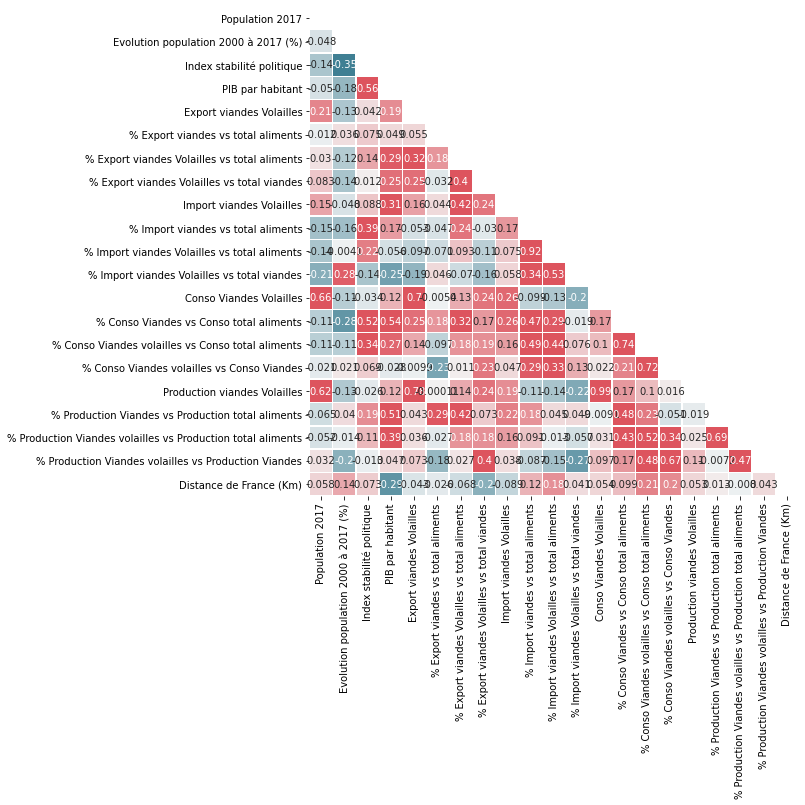

In [12]:
# Compute the correlation matrix
corr = df_all_items.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
fig = sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
                  square=True, linewidths=.5, cbar=None)

In [13]:
df = df_all_items[['Zone', 'Distance de France (Km)',
                  'Evolution population 2000 à 2017 (%)', 'Index stabilité politique',
                   'PIB par habitant', '% Import viandes Volailles vs total aliments',
                   '% Conso Viandes volailles vs Conso total aliments']]

<ipython-input-14-6a1673351516>:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



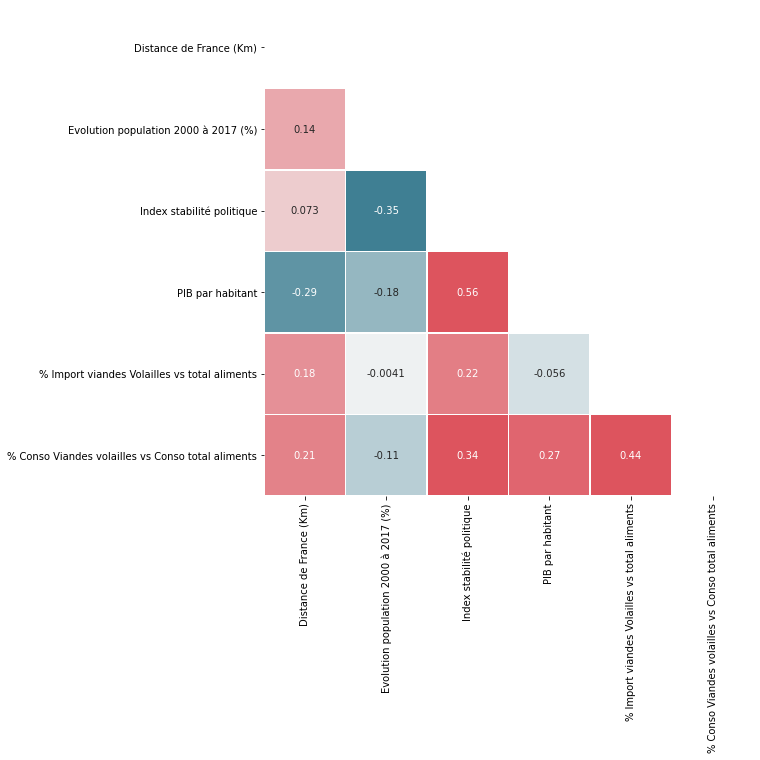

In [14]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
fig = sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
                  square=True, linewidths=.5, cbar=None)

## Classification ascendante hiérarchique

In [15]:
# definir df_cah
df = df.set_index('Zone')
df_cah = df
df_cah

Distance de France (Km)  \
Zone                                            
États-Unis                               6166   
Chine                                    8216   
Brésil                                   8602   
Russie                                   2486   
Mexique                                  9086   
...                                       ...   
Djibouti                                 5528   
Kiribati                                14362   
Sao Tomé-et-Principe                     5340   
Laos                                     9237   
Ouzbékistan                              5147   

                      Evolution population 2000 à 2017 (%)  \
Zone                                                         
États-Unis                                           15.40   
Chine                                                10.11   
Brésil                                               18.90   
Russie                                               -0.60   
Mexique                                              26.17   
...                                                    ...   
Djibouti                                             31.57   
Kiribati                                             35.26   
Sao Tomé-et-Principe                                 45.57   
Laos                                                 30.61   
Ouzbékistan                                          29.03   

                      Index stabilité politique  PIB par habitant  \
Zone                                                                
États-Unis                                 0.34           60109.7   
Chine                                      0.00           14621.2   
Brésil                                    -0.42           14524.6   
Russie                                    -0.64           25926.4   
Mexique                                   -0.72           19721.3   
...                                         ...               ...   
Djibouti                                  -0.74            4885.2   
Kiribati                                   0.88            2235.7   
Sao Tomé-et-Principe                       0.19            3952.9   
Laos                                       0.40            7257.8   
Ouzbékistan                               -0.24            6518.8   

                      % Import viandes Volailles vs total aliments  \
Zone                                                                 
États-Unis                                                    0.15   
Chine                                                         0.22   
Brésil                                                        0.02   
Russie                                                        0.94   
Mexique                                                       2.18   
...                                                            ...   
Djibouti                                                      0.20   
Kiribati                                                      3.45   
Sao Tomé-et-Principe                                          4.65   
Laos                                                          0.00   
Ouzbékistan                                                   0.00   

                      % Conso Viandes volailles vs Conso total aliments  
Zone                                                                     
États-Unis                                                         5.62  
Chine                                                              1.27  
Brésil                                                             6.23  
Russie                                                             3.49  
Mexique                                                            4.37  
...                                                                 ...  
Djibouti                                                           0.74  
Kiribati                                                           2.86  
Sao Tomé-et-Principe        

In [16]:
# Données
X_cah = df_cah.select_dtypes('number')

In [17]:
# Etiquettes des échantillons
y_cah = df_cah.index

In [18]:
scaler = preprocessing.StandardScaler()
X_scaled_cah = scaler.fit_transform(X_cah)

In [19]:
# clustering hierarchique
Z = linkage(X_scaled_cah, 'ward')

### Réaliser un clustering hiérarchique

In [20]:
#metric = 'euclidean'
#method = 'ward'
#cmap = 'coolwarm'

#clustergrid = sns.clustermap(X_scaled_cah.T, figsize=(16, 12), metric=metric, method=method, cmap=cmap,
                             #row_cluster=True, col_cluster=True,
                             #center=0.0, vmin=-4.8, vmax=4.8)

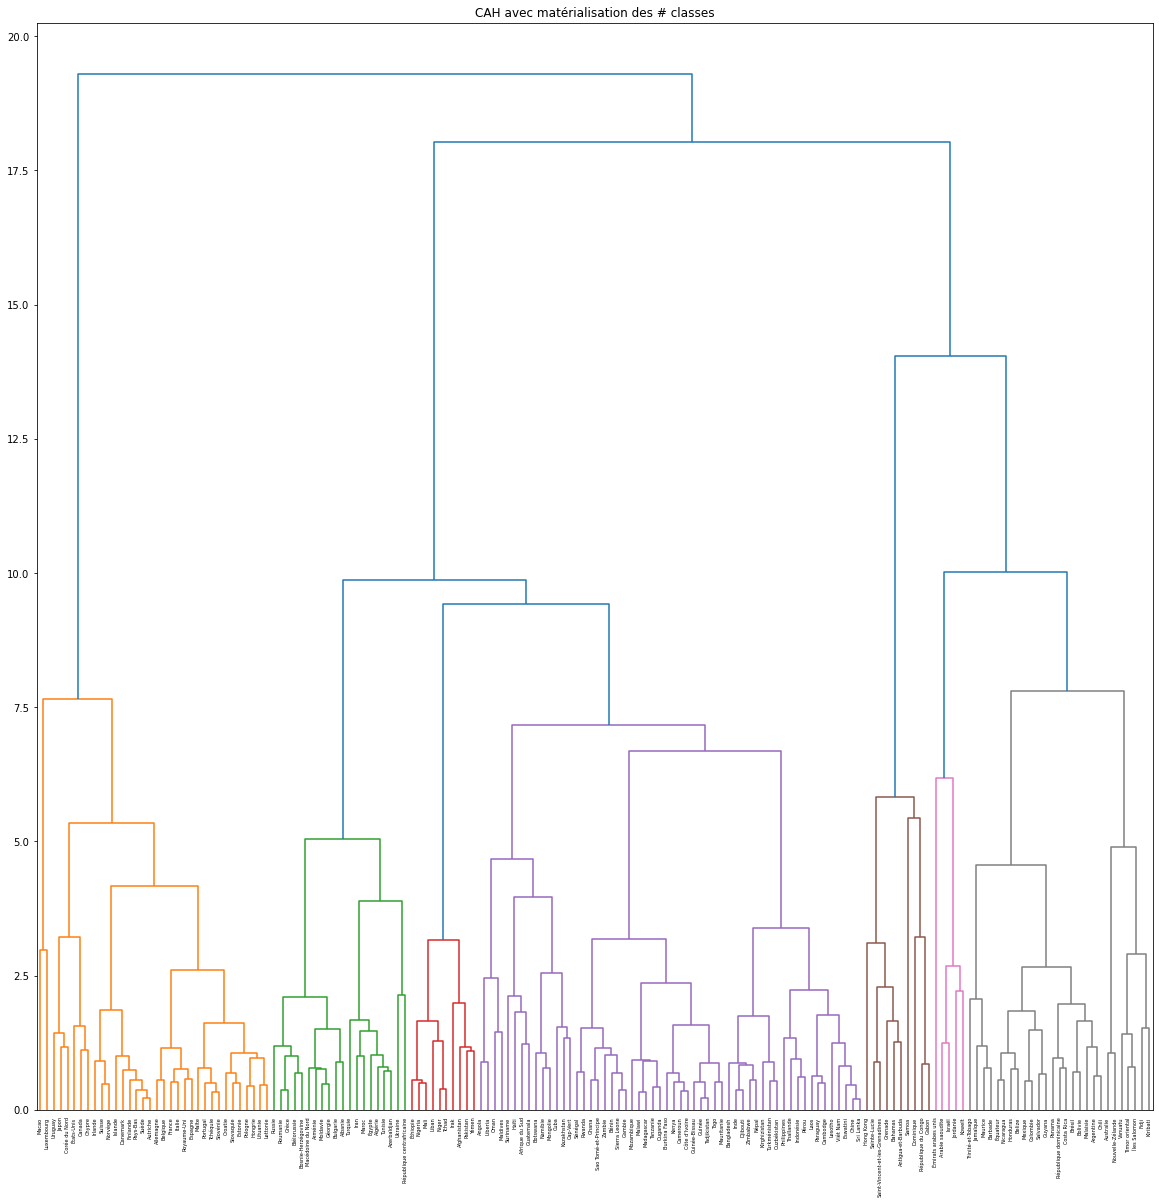

In [21]:
# Création d'un dendrogramme avec les clusters en couleurs
Z = linkage(X_scaled_cah, method='ward', metric='euclidean')
fig = plt.figure(figsize=(20, 20))
plt.title('CAH avec matérialisation des # classes')
dendrogram(Z, labels=df_cah.index, color_threshold=8)

plt.savefig('cah.png')
plt.show()

# découpage à la hauteur t = n ==> identifiants de n groupes obtenus
groupes_cah = fcluster(Z, t=7.5, criterion='distance')

In [22]:
df_cah["CAH"] = groupes_cah
df_cah.head()

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
Zone                                                                        
États-Unis                     6166                                 15.40   
Chine                          8216                                 10.11   
Brésil                         8602                                 18.90   
Russie                         2486                                 -0.60   
Mexique                        9086                                 26.17   

            Index stabilité politique  PIB par habitant  \
Zone                                                      
États-Unis                       0.34           60109.7   
Chine                            0.00           14621.2   
Brésil                          -0.42           14524.6   
Russie                          -0.64           25926.4   
Mexique                         -0.72           19721.3   

            % Import viandes Volailles vs total aliments  \
Zone                                                       
États-Unis                                          0.15   
Chine                                               0.22   
Brésil                                              0.02   
Russie                                              0.94   
Mexique                                             2.18   

            % Conso Viandes volailles vs Conso total aliments  CAH  
Zone                                                                
États-Unis                                               5.62    2  
Chine                                                    1.27    5  
Brésil                                                   6.23    8  
Russie                                                   3.49    3  
Mexique                                                  4.37    8

In [23]:
#sns.pairplot(df_cah, kind="scatter", hue = 'CAH', palette = "Paired")

### Centroides

In [24]:
# les moyennes des groupes CAH par feature
df_cah_gb = df_cah.groupby(["CAH"]).mean()
df_cah_gb

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
CAH                                                                  
1                4952.500000                             40.635000   
2                2302.062500                              6.766875   
3                2498.600000                              7.044000   
4                4620.600000                             67.413000   
5                6912.089286                             41.196786   
6                7890.500000                             23.549000   
7                4200.000000                             98.184000   
8                8874.550000                             22.851000   
9               15923.142857                             34.830000   

     Index stabilité politique  PIB par habitant  \
CAH                                                
1                     1.380000     119246.000000   
2                     0.794375      44422.359375   
3                    -0.649000      15546.795000   
4                    -2.024000       4650.580000   
5                    -0.259643       7241.341071   
6                     0.721000      19642.970000   
7                    -0.280000      42836.600000   
8                     0.063500      16154.160000   
9                     0.710000      16474.871429   

     % Import viandes Volailles vs total aliments  \
CAH                                                 
1                                        2.995000   
2                                        1.106875   
3                                        2.119500   
4                                        0.741000   
5                                        1.940714   
6                                       13.587000   
7                                        2.172000   
8                                        0.869000   
9                                        3.357143   

     % Conso Viandes volailles vs Conso total aliments  
CAH                                                     
1                                             3.280000  
2                                             2.576563  
3                                             2.155500  
4                                             1.115000  
5                                             1.409643  
6                                             7.479000  
7                                             6.994000  
8                                             5.515500  
9                                             2.880000

In [25]:
# les pays par groupe cah
for i in range(1, 9):
    print("Groupe {}:".format(i))
    print(", ".join(df_cah[df_cah['CAH'] ==
          i].index.get_level_values('Zone').sort_values()))

Groupe 1:
Luxembourg, Macao
Groupe 2:
Allemagne, Autriche, Belgique, Canada, Chypre, Corée du Nord, Croatie, Danemark, Espagne, Estonie, Finlande, France, Hongrie, Irlande, Islande, Italie, Japon, Lettonie, Lituanie, Malte, Norvège, Pays-Bas, Pologne, Portugal, Royaume-Uni, Slovaquie, Slovénie, Suisse, Suède, Tchéquie, Uruguay, États-Unis
Groupe 3:
Albanie, Algérie, Arménie, Azerbaïdjan, Biélorussie, Bosnie-Herzégovine, Bulgarie, Grèce, Géorgie, Iran, Macédoine du Nord, Maroc, Moldavie, Roumanie, Russie, République centrafricaine, Tunisie, Turquie, Ukraine, Égypte
Groupe 4:
Afghanistan, Irak, Liban, Mali, Niger, Nigeria, Pakistan, Tchad, Yémen, Éthiopie
Groupe 5:
Afrique du Sud, Angola, Bangladesh, Botswana, Burkina Faso, Bénin, Cambodge, Cameroun, Cap-Vert, Chine, Cuba, Côte d'Ivoire, Djibouti, Eswatini, Gambie, Ghana, Guatemala, Guinée, Guinée-Bissau, Haïti, Inde, Indonésie, Kazakhstan, Kenya, Kirghizistan, Laos, Lesotho, Liberia, Madagascar, Malawi, Maldives, Mauritanie, Mongolie, M

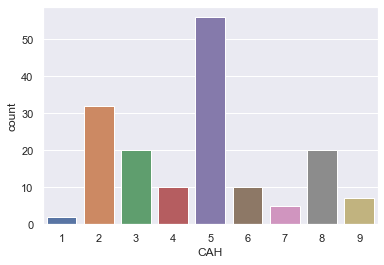

In [26]:
# repartition nb de pays /cluster
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="CAH", data=df_cah)

### Visualisation cluster

In [27]:
df_iso_pays = df_all_items[['Zone', 'Code ISO']]

In [28]:
df_cah_iso = pd.merge(df_iso_pays, df_cah, on="Zone")

In [29]:
df_cah_iso = df_cah_iso.sort_values(by='CAH', ascending=True)

In [30]:
df_cah_iso['CAH'] = df_cah_iso['CAH'].astype(object)

In [31]:
fig = px.choropleth(
    df_cah_iso,
    locations=df_cah_iso['Code ISO'],
    color=df_cah_iso['CAH'],
    hover_name=df_cah_iso["Zone"],
    color_continuous_scale=px.colors.sequential.Viridis,
    labels={'CAH': 'Cluster'})

fig.update_layout(
    title_text='Les Clusters avec CAH', title_x=0.5,
    font=dict(size=10))
fig.show()

### Heatmap

In [32]:
df_cah = df_cah.reset_index("Zone")
df_cah = df_cah.set_index('CAH')
df_cah = df_cah.drop(['Zone'], axis=1)
df_cah

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
CAH                                                                  
2                       6166                                 15.40   
5                       8216                                 10.11   
8                       8602                                 18.90   
3                       2486                                 -0.60   
8                       9086                                 26.17   
..                       ...                                   ...   
5                       5528                                 31.57   
9                      14362                                 35.26   
5                       5340                                 45.57   
5                       9237                                 30.61   
5                       5147                                 29.03   

     Index stabilité politique  PIB par habitant  \
CAH                                                
2                         0.34           60109.7   
5                         0.00           14621.2   
8                        -0.42           14524.6   
3                        -0.64           25926.4   
8                        -0.72           19721.3   
..                         ...               ...   
5                        -0.74            4885.2   
9                         0.88            2235.7   
5                         0.19            3952.9   
5                         0.40            7257.8   
5                        -0.24            6518.8   

     % Import viandes Volailles vs total aliments  \
CAH                                                 
2                                            0.15   
5                                            0.22   
8                                            0.02   
3                                            0.94   
8                                            2.18   
..                                            ...   
5                                            0.20   
9                                            3.45   
5                                            4.65   
5                                            0.00   
5                                            0.00   

     % Conso Viandes volailles vs Conso total aliments  
CAH                                                     
2                                                 5.62  
5                                                 1.27  
8                                                 6.23  
3                                                 3.49  
8                                                 4.37  
..                                                 ...  
5                                                 0.74  
9                                                 2.86  
5                                                 1.63  
5                                                 0.00  
5                                                 0.00  

[162 rows x 6 columns]

In [33]:
# Centrage et réduction des données
scaler = preprocessing.StandardScaler()
X_scaled_cah = scaler.fit_transform(X_cah)

In [34]:
# On crée un dataframe de nos données centrées réduites car on s'en servira pour afficher la heatmap des centroïds
df_cah_c_r = pd.DataFrame(
    X_scaled_cah, index=df_cah.index, columns=df_cah.columns)
df_cah_gb_c_r = df_cah_c_r.groupby(["CAH"]).mean()
df_cah_gb_c_r

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
CAH                                                                  
1                  -0.249405                              0.367029   
2                  -0.947592                             -0.793107   
3                  -0.895820                             -0.783615   
4                  -0.336835                              1.284296   
5                   0.266797                              0.386272   
6                   0.524533                             -0.218244   
7                  -0.447631                              2.338342   
8                   0.783755                             -0.242154   
9                   2.640519                              0.168181   

     Index stabilité politique  PIB par habitant  \
CAH                                                
1                     1.601901          4.761001   
2                     0.944260          1.164428   
3                    -0.676613         -0.223544   
4                    -2.220702         -0.747296   
5                    -0.239375         -0.622765   
6                     0.861862         -0.026652   
7                    -0.262235          1.088205   
8                     0.123506         -0.194349   
9                     0.849509         -0.178934   

     % Import viandes Volailles vs total aliments  \
CAH                                                 
1                                        0.168029   
2                                       -0.358086   
3                                       -0.075924   
4                                       -0.460035   
5                                       -0.125741   
6                                        3.119432   
7                                       -0.061295   
8                                       -0.424369   
9                                        0.268939   

     % Conso Viandes volailles vs Conso total aliments  
CAH                                                     
1                                             0.179711  
2                                            -0.117435  
3                                            -0.295301  
4                                            -0.734829  
5                                            -0.610366  
6                                             1.953454  
7                                             1.748580  
8                                             1.124032  
9                                             0.010743

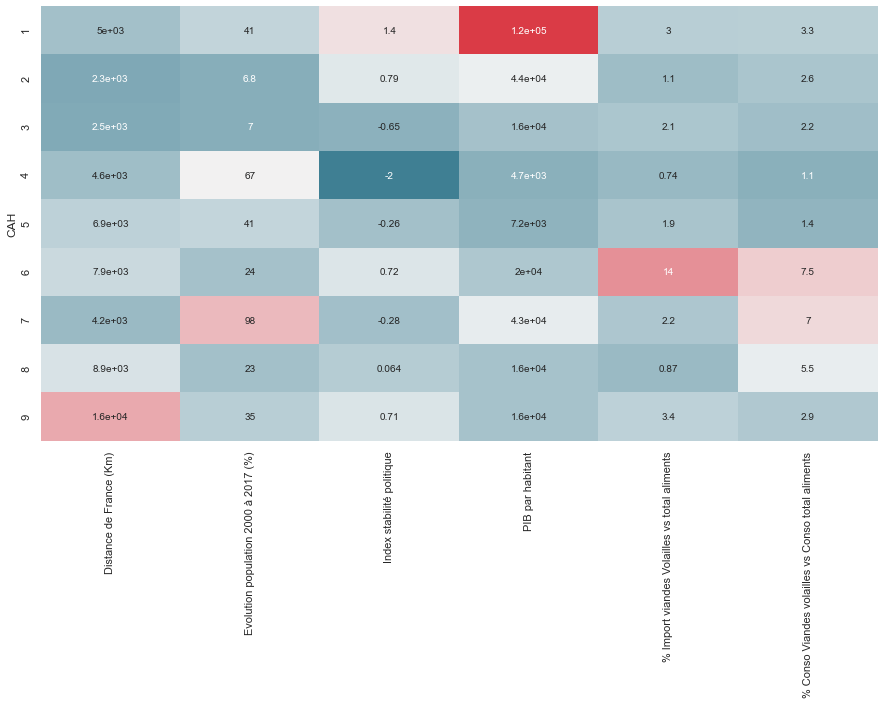

In [35]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_cah_gb_c_r, cmap=cmap, annot=df_cah_gb,
            annot_kws={'size': 10}, cbar=None)
plt.savefig('heatmap_cah.png')

## Algorithme du K-means

In [36]:
# definir df_kmeans
df_kmeans = df
df_kmeans.drop(['CAH'], axis=1, inplace=True)
df_kmeans

Distance de France (Km)  \
Zone                                            
États-Unis                               6166   
Chine                                    8216   
Brésil                                   8602   
Russie                                   2486   
Mexique                                  9086   
...                                       ...   
Djibouti                                 5528   
Kiribati                                14362   
Sao Tomé-et-Principe                     5340   
Laos                                     9237   
Ouzbékistan                              5147   

                      Evolution population 2000 à 2017 (%)  \
Zone                                                         
États-Unis                                           15.40   
Chine                                                10.11   
Brésil                                               18.90   
Russie                                               -0.60   
Mexique                                              26.17   
...                                                    ...   
Djibouti                                             31.57   
Kiribati                                             35.26   
Sao Tomé-et-Principe                                 45.57   
Laos                                                 30.61   
Ouzbékistan                                          29.03   

                      Index stabilité politique  PIB par habitant  \
Zone                                                                
États-Unis                                 0.34           60109.7   
Chine                                      0.00           14621.2   
Brésil                                    -0.42           14524.6   
Russie                                    -0.64           25926.4   
Mexique                                   -0.72           19721.3   
...                                         ...               ...   
Djibouti                                  -0.74            4885.2   
Kiribati                                   0.88            2235.7   
Sao Tomé-et-Principe                       0.19            3952.9   
Laos                                       0.40            7257.8   
Ouzbékistan                               -0.24            6518.8   

                      % Import viandes Volailles vs total aliments  \
Zone                                                                 
États-Unis                                                    0.15   
Chine                                                         0.22   
Brésil                                                        0.02   
Russie                                                        0.94   
Mexique                                                       2.18   
...                                                            ...   
Djibouti                                                      0.20   
Kiribati                                                      3.45   
Sao Tomé-et-Principe                                          4.65   
Laos                                                          0.00   
Ouzbékistan                                                   0.00   

                      % Conso Viandes volailles vs Conso total aliments  
Zone                                                                     
États-Unis                                                         5.62  
Chine                                                              1.27  
Brésil                                                             6.23  
Russie                                                             3.49  
Mexique                                                            4.37  
...                                                                 ...  
Djibouti                                                           0.74  
Kiribati                                                           2.86  
Sao Tomé-et-Principe        

### Tests de normalité

C:\Users\perso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Distance de France (Km)


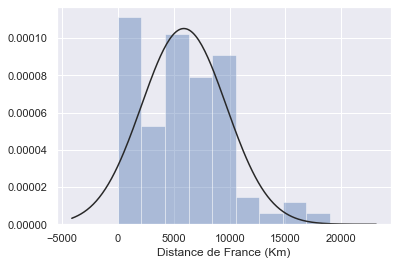

C:\Users\perso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Evolution population 2000 à 2017 (%)


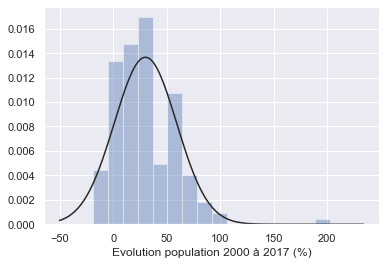

Index stabilité politique


C:\Users\perso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



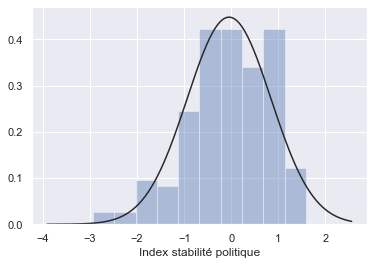

C:\Users\perso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



PIB par habitant


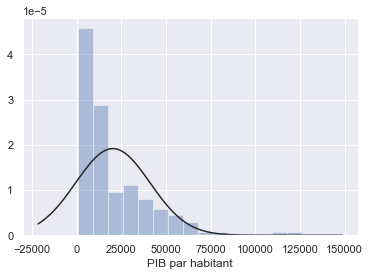

C:\Users\perso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



% Import viandes Volailles vs total aliments


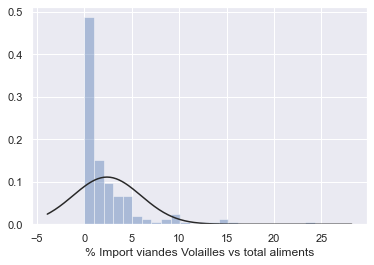

C:\Users\perso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



% Conso Viandes volailles vs Conso total aliments


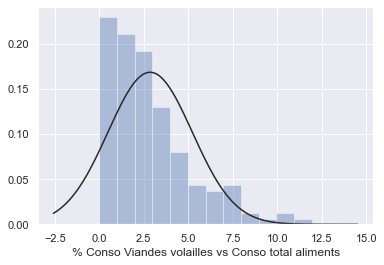

In [37]:
# verification de la distribution gausienne, test de normalité
for col in df_kmeans.select_dtypes('number'):
    plt.figure()
    sns.distplot(df_kmeans[col], fit=norm, kde=False)
    print(col)
    plt.show()

In [38]:
# test de normalité Shapiro-Wilk
seuil = 0.05

for col in df.select_dtypes('number'):
    w, pvalue = st.shapiro(df[col])
    print(f'{col :-<70} {w} {pvalue}')
    if pvalue > seuil:
        print("On ne peux pas rejetter H0: la distribution suit une loi normale")
    else:
        print("On rejette H0 : la distribution ne suit pas une loi normale")

Distance de France (Km)----------------------------------------------- 0.9467079639434814 8.397406418225728e-06
On rejette H0 : la distribution ne suit pas une loi normale
Evolution population 2000 à 2017 (%)---------------------------------- 0.9010635614395142 5.583919104878987e-09
On rejette H0 : la distribution ne suit pas une loi normale
Index stabilité politique--------------------------------------------- 0.9636574387550354 0.00029910990269854665
On rejette H0 : la distribution ne suit pas une loi normale
PIB par habitant------------------------------------------------------ 0.802208423614502 1.564300718039785e-13
On rejette H0 : la distribution ne suit pas une loi normale
% Import viandes Volailles vs total aliments-------------------------- 0.660217821598053 7.953430925203517e-18
On rejette H0 : la distribution ne suit pas une loi normale
% Conso Viandes volailles vs Conso total aliments--------------------- 0.8829450607299805 5.480857989681454e-10
On rejette H0 : la distributi

Distance de France (Km)


<Figure size 432x288 with 0 Axes>

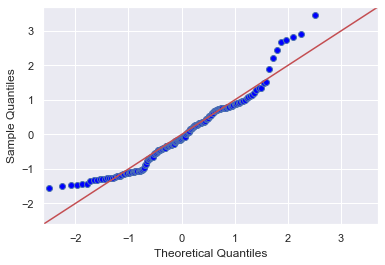

Evolution population 2000 à 2017 (%)


<Figure size 432x288 with 0 Axes>

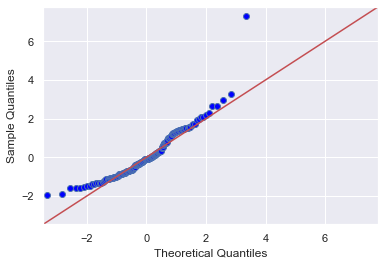

Index stabilité politique


<Figure size 432x288 with 0 Axes>

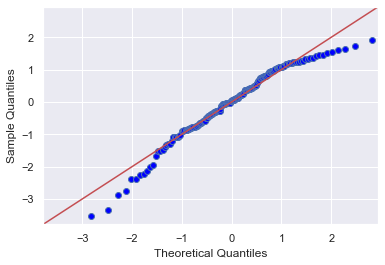

PIB par habitant


<Figure size 432x288 with 0 Axes>

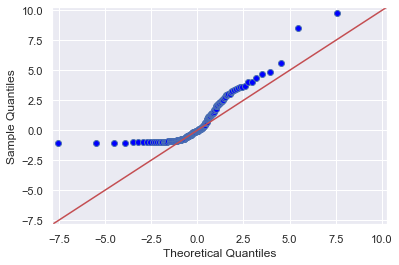

% Import viandes Volailles vs total aliments


<Figure size 432x288 with 0 Axes>

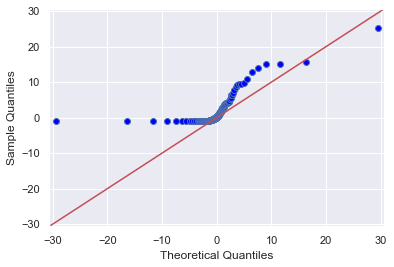

% Conso Viandes volailles vs Conso total aliments


<Figure size 432x288 with 0 Axes>

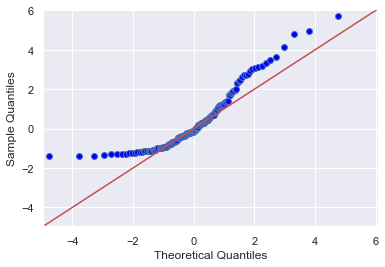

In [39]:
# qqpolot vs. loi normale (droite de Henry)
for col in df.select_dtypes('number'):
    plt.figure()
    sm.qqplot(df[col], st.t, fit=True, line="45")
    print(col)
    plt.show()

Nous remarquons un écart à la normalité.

### Transformation yeo-johnson

In [40]:
df

Distance de France (Km)  \
Zone                                            
États-Unis                               6166   
Chine                                    8216   
Brésil                                   8602   
Russie                                   2486   
Mexique                                  9086   
...                                       ...   
Djibouti                                 5528   
Kiribati                                14362   
Sao Tomé-et-Principe                     5340   
Laos                                     9237   
Ouzbékistan                              5147   

                      Evolution population 2000 à 2017 (%)  \
Zone                                                         
États-Unis                                           15.40   
Chine                                                10.11   
Brésil                                               18.90   
Russie                                               -0.60   
Mexique                                              26.17   
...                                                    ...   
Djibouti                                             31.57   
Kiribati                                             35.26   
Sao Tomé-et-Principe                                 45.57   
Laos                                                 30.61   
Ouzbékistan                                          29.03   

                      Index stabilité politique  PIB par habitant  \
Zone                                                                
États-Unis                                 0.34           60109.7   
Chine                                      0.00           14621.2   
Brésil                                    -0.42           14524.6   
Russie                                    -0.64           25926.4   
Mexique                                   -0.72           19721.3   
...                                         ...               ...   
Djibouti                                  -0.74            4885.2   
Kiribati                                   0.88            2235.7   
Sao Tomé-et-Principe                       0.19            3952.9   
Laos                                       0.40            7257.8   
Ouzbékistan                               -0.24            6518.8   

                      % Import viandes Volailles vs total aliments  \
Zone                                                                 
États-Unis                                                    0.15   
Chine                                                         0.22   
Brésil                                                        0.02   
Russie                                                        0.94   
Mexique                                                       2.18   
...                                                            ...   
Djibouti                                                      0.20   
Kiribati                                                      3.45   
Sao Tomé-et-Principe                                          4.65   
Laos                                                          0.00   
Ouzbékistan                                                   0.00   

                      % Conso Viandes volailles vs Conso total aliments  
Zone                                                                     
États-Unis                                                         5.62  
Chine                                                              1.27  
Brésil                                                             6.23  
Russie                                                             3.49  
Mexique                                                            4.37  
...                                                                 ...  
Djibouti                                                           0.74  
Kiribati                                                           2.86  
Sao Tomé-et-Principe        

In [41]:
t = df.copy()

In [42]:
X_t = t.select_dtypes('number')

In [43]:
power = PowerTransformer(method='yeo-johnson')

In [44]:
X_trans = power.fit_transform(X_t)

In [45]:
df_X_trans = pd.DataFrame(X_trans)

In [46]:
df_X_trans

0         1         2         3         4         5
0    0.235508 -0.375855  0.343059  1.534529 -1.065071  1.204276
1    0.698816 -0.577102 -0.083940  0.142254 -0.944326 -0.595074
2    0.779564 -0.249879 -0.540308  0.136219 -1.322081  1.347853
3   -0.847404 -1.085409 -0.755964  0.680560 -0.116518  0.563629
4    0.878399 -0.001042 -0.831272  0.419257  0.568869  0.860636
..        ...       ...       ...       ...       ...       ...
157  0.076624  0.175251 -0.849863 -0.798512 -0.977725 -1.058519
158  1.825360  0.292399  1.120281 -1.403567  0.942728  0.310481
159  0.028149  0.608219  0.148136 -0.967582  1.170870 -0.341364
160  0.908714  0.144356  0.423744 -0.471742 -1.366092 -2.045659
161 -0.022473  0.093104 -0.352973 -0.561789 -1.366092 -2.045659

[162 rows x 6 columns]

In [47]:
# test de normalité Shapiro-Wilk
seuil = 0.05

for col in df_X_trans:
    w, pvalue = st.shapiro(df_X_trans[col])
    print(f'{col :-<70} {w} {pvalue}')
    if pvalue > seuil:
        print("On ne peux pas rejetter H0: la distribution suit une loi normale")
    else:
        print("On rejette H0 : la distribution ne suit pas une loi normale")

0--------------------------------------------------------------------- 0.9810321927070618 0.025447914376854897
On rejette H0 : la distribution ne suit pas une loi normale
1--------------------------------------------------------------------- 0.9737646579742432 0.003565523773431778
On rejette H0 : la distribution ne suit pas une loi normale
2--------------------------------------------------------------------- 0.9880953431129456 0.18617120385169983
On ne peux pas rejetter H0: la distribution suit une loi normale
3--------------------------------------------------------------------- 0.9791262745857239 0.014992370270192623
On rejette H0 : la distribution ne suit pas une loi normale
4--------------------------------------------------------------------- 0.9414035081863403 3.096274667768739e-06
On rejette H0 : la distribution ne suit pas une loi normale
5--------------------------------------------------------------------- 0.9862205982208252 0.11029385030269623
On ne peux pas rejetter H0: la

0


<Figure size 432x288 with 0 Axes>

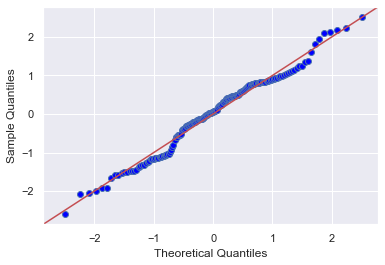

1


<Figure size 432x288 with 0 Axes>

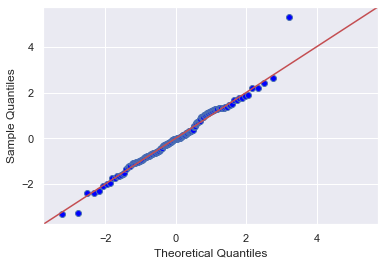

2


<Figure size 432x288 with 0 Axes>

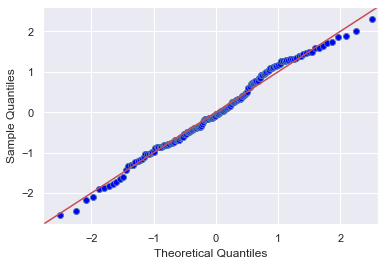

3


<Figure size 432x288 with 0 Axes>

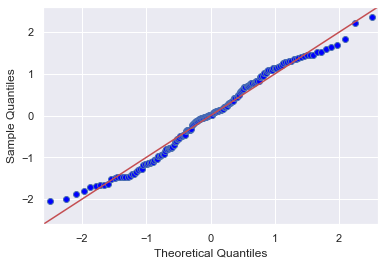

4


<Figure size 432x288 with 0 Axes>

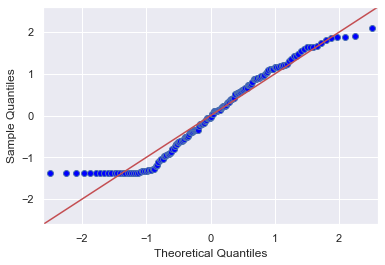

5


<Figure size 432x288 with 0 Axes>

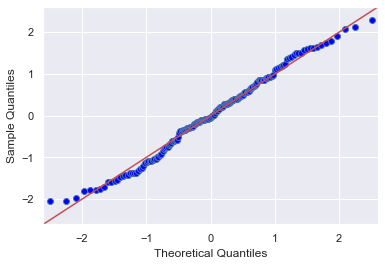

In [48]:
for col in df_X_trans:
    plt.figure()
    sm.qqplot(df_X_trans[col], st.t, fit=True, line="45")
    print(col)
    plt.show()

In [49]:
df=df.reset_index()

In [50]:
df_kmeans = pd.concat([df['Zone'], df_X_trans], axis=1)

In [51]:
df_kmeans

Zone         0         1         2         3         4  \
0              États-Unis  0.235508 -0.375855  0.343059  1.534529 -1.065071   
1                   Chine  0.698816 -0.577102 -0.083940  0.142254 -0.944326   
2                  Brésil  0.779564 -0.249879 -0.540308  0.136219 -1.322081   
3                  Russie -0.847404 -1.085409 -0.755964  0.680560 -0.116518   
4                 Mexique  0.878399 -0.001042 -0.831272  0.419257  0.568869   
..                    ...       ...       ...       ...       ...       ...   
157              Djibouti  0.076624  0.175251 -0.849863 -0.798512 -0.977725   
158              Kiribati  1.825360  0.292399  1.120281 -1.403567  0.942728   
159  Sao Tomé-et-Principe  0.028149  0.608219  0.148136 -0.967582  1.170870   
160                  Laos  0.908714  0.144356  0.423744 -0.471742 -1.366092   
161           Ouzbékistan -0.022473  0.093104 -0.352973 -0.561789 -1.366092   

            5  
0    1.204276  
1   -0.595074  
2    1.347853  
3    0.563629  
4    0.860636  
..        ...  
157 -1.058519  
158  0.310481  
159 -0.341364  
160 -2.045659  
161 -2.045659  

[162 rows x 7 columns]

In [52]:
df_kmeans = df_kmeans.set_index('Zone')

In [53]:
# Données
X_kmeans = df_kmeans.select_dtypes('number')

In [54]:
# Etiquettes des échantillons
y_kmeans = df_kmeans.index

### K value

In [55]:
kmeans_per_k = [KMeans(n_clusters=k).fit(X_kmeans)
                for k in range(1, 19)]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\perso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\perso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\perso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\perso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

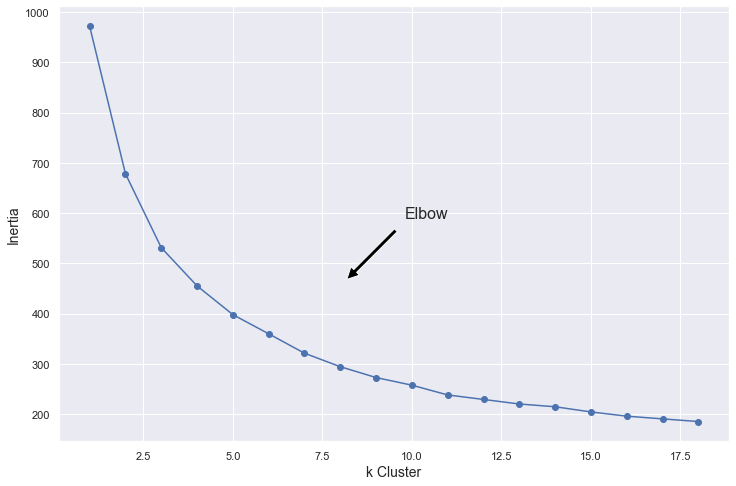

In [56]:
# plot inertia as a function of k and analyze the resulting curve.
plt.figure(figsize=(12, 8))
plt.plot(range(1, 19), inertias, 'bo-')
plt.xlabel('k Cluster', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.annotate('Elbow',
             xy=(8, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords="figure fraction",
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))

plt.show()

In [57]:
k = 7
kmeans = KMeans(n_clusters=k).fit(X_kmeans)

C:\Users\perso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [58]:
silhouette_scores = [silhouette_score(X_kmeans, model.labels_)
                     for model in kmeans_per_k[1:]]   # kmeans_per_k[0] is 1 cluster, not considered

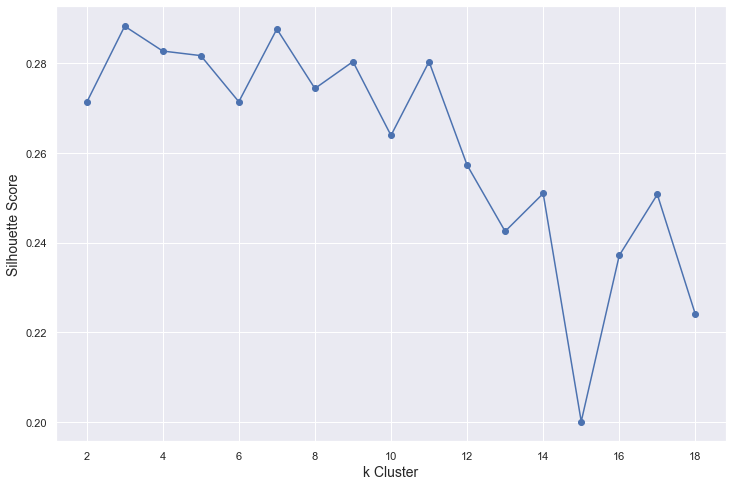

In [59]:
# plot the silhouette score as a function of k
plt.figure(figsize=(12, 8))
plt.plot(range(2, 19), silhouette_scores, 'bo-')
plt.xlabel('k Cluster', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.show()

In [60]:
df_kmeans['Kmeans'] = kmeans.labels_

In [61]:
df_kmeans.head()

0         1         2         3         4         5  Kmeans
Zone                                                                          
États-Unis  0.235508 -0.375855  0.343059  1.534529 -1.065071  1.204276       2
Chine       0.698816 -0.577102 -0.083940  0.142254 -0.944326 -0.595074       2
Brésil      0.779564 -0.249879 -0.540308  0.136219 -1.322081  1.347853       2
Russie     -0.847404 -1.085409 -0.755964  0.680560 -0.116518  0.563629       5
Mexique     0.878399 -0.001042 -0.831272  0.419257  0.568869  0.860636       2

### Centroides

In [62]:
# les moyennes des groupes Kmeans par feature
df_kmeans_gb = df_kmeans.groupby(["Kmeans"]).mean()
df_kmeans_gb

0         1         2         3         4         5
Kmeans                                                            
0       0.688112 -0.345308  0.916823  0.286905  1.266415  1.191910
1       0.075844  0.705516 -0.979623 -0.993186 -1.076951 -1.289070
2       0.783424 -0.151422 -0.035765  0.239632 -0.790419  0.465670
3      -0.008192  2.077629  0.027782  0.770590  0.965512  1.056391
4       0.336159  0.704032 -0.529691 -1.083396  0.895074 -0.470644
5      -1.032517 -1.733392 -0.158699  0.396087  0.498268  0.016318
6      -1.469223 -0.615988  1.090789  1.268072 -0.086873  0.106313

In [63]:
# les pays par Cluster
for i in range(0, 7):
    print("Groupe {}:".format(i))
    print(", ".join(df_kmeans[df_kmeans['Kmeans'] ==
          i].index.get_level_values('Zone').sort_values()))

Groupe 0:
Afrique du Sud, Antigua-et-Barbuda, Bahamas, Barbade, Cap-Vert, Chili, Cuba, Dominique, Grenade, Hong Kong, Jamaïque, Japon, Kazakhstan, Kiribati, Macao, Namibie, Saint-Vincent-et-les-Grenadines, Sainte-Lucie, Samoa, Suriname, Trinité-et-Tobago
Groupe 1:
Afghanistan, Algérie, Bangladesh, Burkina Faso, Cambodge, Cameroun, Côte d'Ivoire, Djibouti, Inde, Kenya, Laos, Liban, Madagascar, Malawi, Mali, Mozambique, Niger, Nigeria, Népal, Ouganda, Ouzbékistan, Pakistan, Rwanda, Sénégal, Tanzanie, Tchad, Tunisie, Turkménistan, Zimbabwe, Égypte, Éthiopie
Groupe 2:
Argentine, Australie, Azerbaïdjan, Belize, Bolivie, Botswana, Brésil, Chine, Colombie, Corée du Nord, Costa Rica, Eswatini, Fidji, Guyana, Honduras, Indonésie, Iran, Israël, Malaisie, Maroc, Maurice, Mexique, Nicaragua, Nouvelle-Zélande, Panama, Paraguay, Pérou, République dominicaine, Salvador, Sri Lanka, Thaïlande, Turquie, Uruguay, Viêt Nam, Équateur, États-Unis
Groupe 3:
Arabie saoudite, Gabon, Jordanie, Koweït, Maldives,

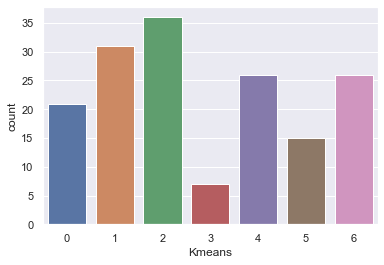

In [64]:
# repartition nb de pays /cluster
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Kmeans", data=df_kmeans)

### Visualisation cluster 

In [65]:
df_kmeans_iso = pd.merge(df_iso_pays, df_kmeans, on="Zone")

In [66]:
df_kmeans_iso = df_kmeans_iso.sort_values(by='Kmeans', ascending=True)

In [67]:
df_kmeans_iso['Kmeans'] = df_kmeans_iso['Kmeans'].astype(object)

In [68]:
fig = px.choropleth(
    df_kmeans_iso,
    locations=df_kmeans_iso['Code ISO'],
    color=df_kmeans_iso['Kmeans'],
    hover_name=df_kmeans_iso["Zone"],
    color_continuous_scale=px.colors.sequential.Viridis,
    labels={'Kmeans': 'Cluster'})

fig.update_layout(
    title_text='Les Clusters avec Kmeans', title_x=0.5,
    font=dict(size=10))
fig.show()

### Heatmap

In [69]:
df_kmeans = df_kmeans.reset_index("Zone")
df_kmeans = df_kmeans.set_index('Kmeans')
df_kmeans = df_kmeans.drop(['Zone'], axis=1)
df_kmeans

0         1         2         3         4         5
Kmeans                                                            
2       0.235508 -0.375855  0.343059  1.534529 -1.065071  1.204276
2       0.698816 -0.577102 -0.083940  0.142254 -0.944326 -0.595074
2       0.779564 -0.249879 -0.540308  0.136219 -1.322081  1.347853
5      -0.847404 -1.085409 -0.755964  0.680560 -0.116518  0.563629
2       0.878399 -0.001042 -0.831272  0.419257  0.568869  0.860636
...          ...       ...       ...       ...       ...       ...
1       0.076624  0.175251 -0.849863 -0.798512 -0.977725 -1.058519
0       1.825360  0.292399  1.120281 -1.403567  0.942728  0.310481
4       0.028149  0.608219  0.148136 -0.967582  1.170870 -0.341364
1       0.908714  0.144356  0.423744 -0.471742 -1.366092 -2.045659
1      -0.022473  0.093104 -0.352973 -0.561789 -1.366092 -2.045659

[162 rows x 6 columns]

In [70]:
# Centrage et réduction des données
scaler = preprocessing.StandardScaler()
X_scaled_kmeans = scaler.fit_transform(X_kmeans)

In [71]:
# On crée un dataframe de nos données centrées réduites car on s'en servira pour afficher la heatmap des centroïds
df_kmeans_c_r = pd.DataFrame(
    X_scaled_kmeans, index=df_kmeans.index, columns=df_kmeans.columns)
df_kmeans_gb_c_r = df_kmeans_c_r.groupby(["Kmeans"]).mean()
df_kmeans_gb_c_r

0         1         2         3         4         5
Kmeans                                                            
0       0.688112 -0.345308  0.916823  0.286905  1.266415  1.191910
1       0.075844  0.705516 -0.979623 -0.993186 -1.076951 -1.289070
2       0.783424 -0.151422 -0.035765  0.239632 -0.790419  0.465670
3      -0.008192  2.077629  0.027782  0.770590  0.965512  1.056391
4       0.336159  0.704032 -0.529691 -1.083396  0.895074 -0.470644
5      -1.032517 -1.733392 -0.158699  0.396087  0.498268  0.016318
6      -1.469223 -0.615988  1.090789  1.268072 -0.086873  0.106313

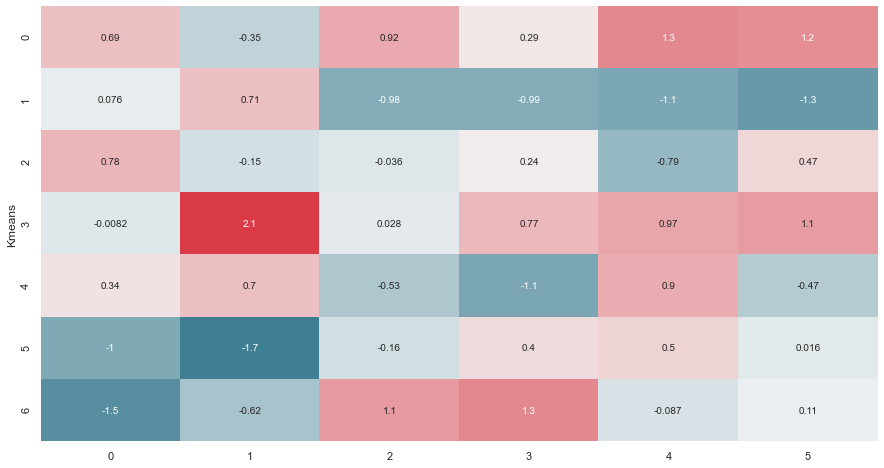

In [72]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_kmeans_gb_c_r, cmap=cmap, annot=df_kmeans_gb,
            annot_kws={'size': 10}, cbar=None)
plt.savefig('heatmap_cah.png')

## Analyse en Composante Principale (ACP)

l'ACP est une méthode statistique qui permet de représenter les données sur un graphique facilement interprétables.

In [73]:
df_acp = df

In [74]:
X = df_acp.select_dtypes('float')

In [75]:
# Initialize
model = pca(n_components=6, normalize=True)

In [76]:
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >Warning: >Number of components can not be more then number of features. n_components is set to 4
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


### Diagramme éboulis des valeurs propres
Les pourcentages d’inertie nous donnent une information sur la « structure » de nos données.

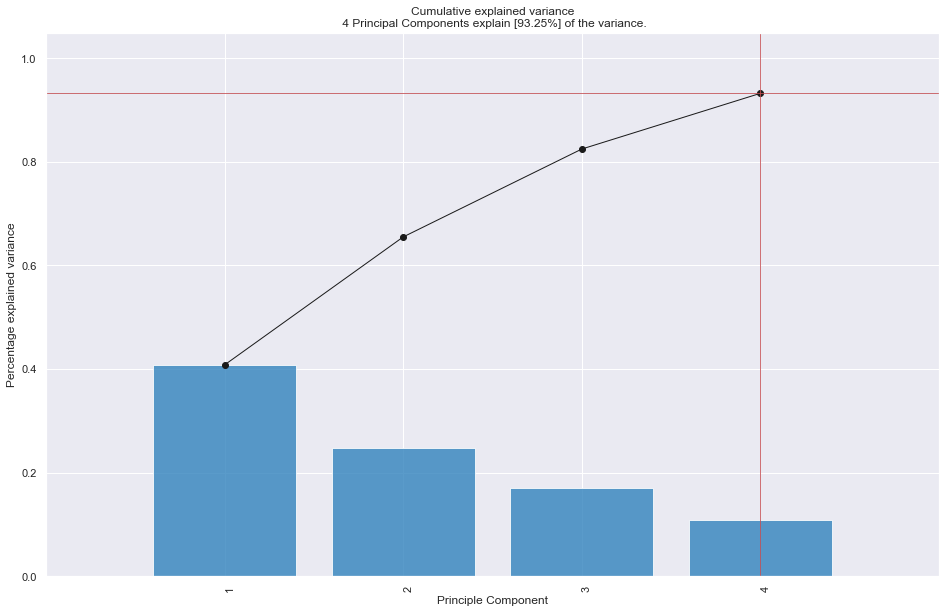

<Figure size 432x288 with 0 Axes>

In [77]:
# Scree plot
fig, ax = model.plot(figsize=(16, 10))

Les 4 premières composantes expliquent 87% de la variance totale des données. On peut donc dire que la dimension intrasèques de cet ensemble de données est raisonnablement égale à 4. Transformons donc la dataframe originelle de 6 variables en une dataframe de 4 variables

[pca] >Plot PC1 vs PC2 with loadings.


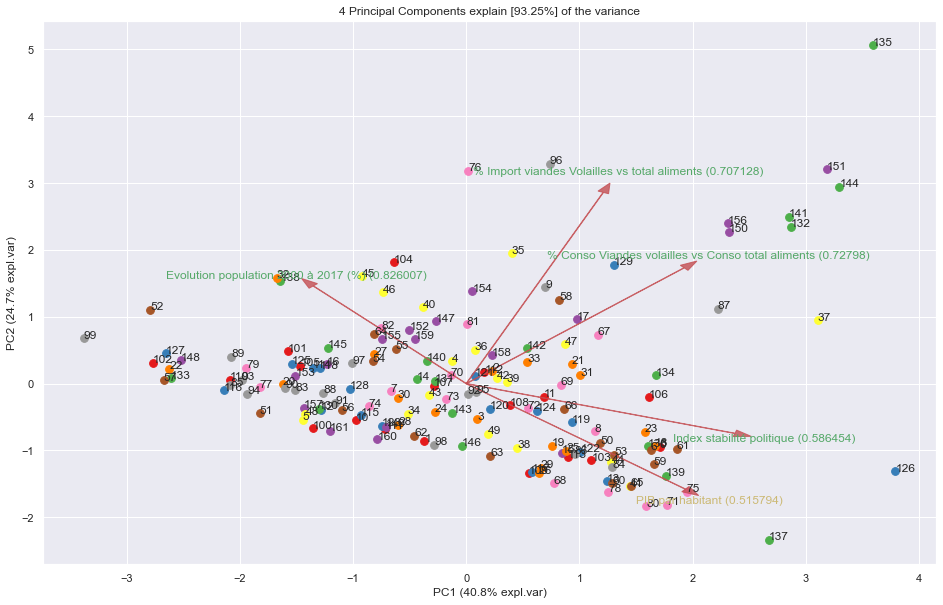

In [78]:
# biplot
fig, ax = model.biplot(label=True, legend=False, figsize=(16, 10))

[pca] >Plot PC1 vs PC2 with loadings.


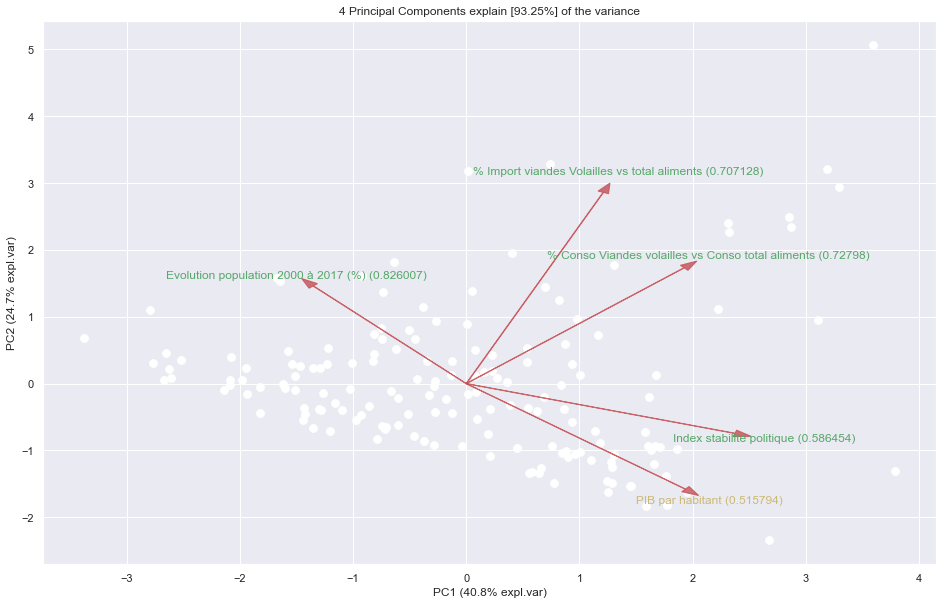

In [79]:
# biplot
fig, ax = model.biplot(cmap=None, label=False, legend=False, figsize=(16, 10))

[pca] >Plot PC1 vs PC2 with loadings.


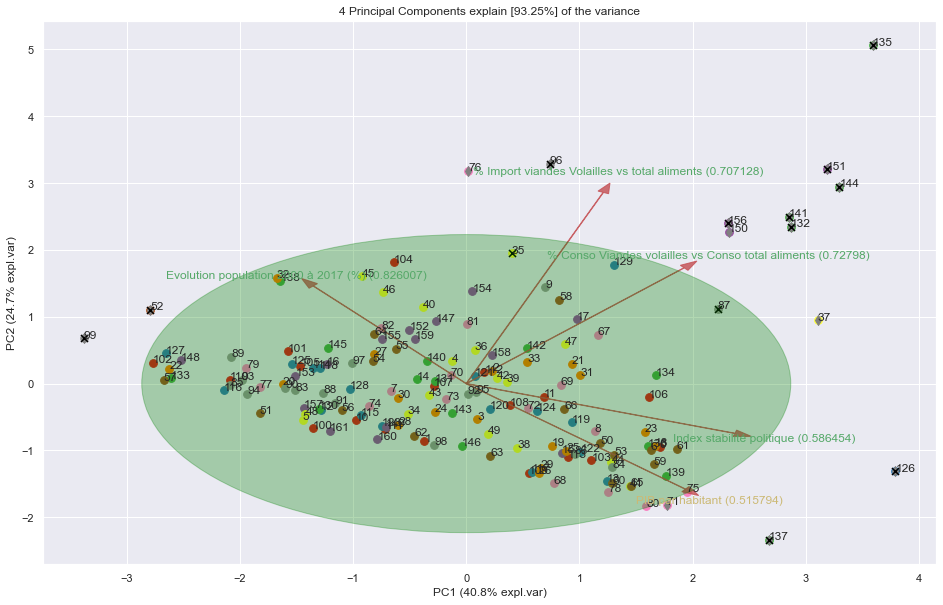

In [80]:
# Outlier
fig, ax = model.biplot(SPE=True, hotellingt2=True,
                       legend=False, figsize=(16, 10))

In [81]:
df = df.reset_index()

In [82]:
df_cah = df_cah.reset_index()

In [83]:
df = pd.concat([df, df_cah[['CAH']]], axis=1)

In [84]:
features = ['Distance de France (Km)',
            'Evolution population 2000 à 2017 (%)', 'Index stabilité politique',
            'PIB par habitant', '% Import viandes Volailles vs total aliments',
            '% Conso Viandes volailles vs Conso total aliments']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:, ['Kmeans']].values
# Standardizing the features
X = StandardScaler().fit_transform(x)

KeyError: "None of [Index(['Kmeans'], dtype='object')] are in the [columns]"

In [ ]:
features = ['Distance de France (Km)',
            'Evolution population 2000 à 2017 (%)', 'Index stabilité politique',
            'PIB par habitant', '% Import viandes Volailles vs total aliments',
            '% Conso Viandes volailles vs Conso total aliments']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:, ['CAH']].values
# Standardizing the features
X = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=[
                           'PCA 1', 'PCA 2', 'PCA 3', 'PCA 4'])

In [ ]:
finalDf_cah = pd.concat([principalDf, df[['CAH']]], axis=1)

In [ ]:
finalDf_cah.head()

In [ ]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=[
                           'PCA 1', 'PCA 2', 'PCA 3', 'PCA 4'])

In [ ]:
finalDf_kmeans = pd.concat([principalDf, df[['Kmeans']]], axis=1)

In [ ]:
finalDf_kmeans.head()

### Analyse PCA 1 & PCA2

In [ ]:
sns.set()
sns.lmplot(
    x='PCA 1',
    y='PCA 2',
    data=finalDf_cah,
    hue='CAH',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('2D PCA Graph CAH')
plt.show()

In [ ]:
sns.set()
sns.lmplot(
    x='PCA 1',
    y='PCA 2',
    data=finalDf_kmeans,
    hue='Kmeans',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('2D PCA Graph kmeans')
plt.show()

### Analyse PCA 3 & PCA 4

In [ ]:
sns.set()
sns.lmplot(
    x='PCA 3',
    y='PCA 4',
    data=finalDf_cah,
    hue='CAH',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('2D PCA Graph CAH')
plt.show()

In [ ]:
sns.set()
sns.lmplot(
    x='PCA 3',
    y='PCA 4',
    data=finalDf_kmeans,
    hue='Kmeans',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('2D PCA Graph kmeans')
plt.show()

### Analyse PCA 1 PCA2 et PCA3

In [ ]:
my_color = finalDf_cah['CAH']


# Plot initialisation
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(finalDf_cah['PCA 1'], finalDf_cah['PCA 2'],
           finalDf_cah['PCA 3'], c=my_color, cmap="Set2_r", s=60)

# make simple, bare axis lines through space:
xAxisLine = ((min(finalDf_cah['PCA 1']), max(
    finalDf_cah['PCA 1'])), (0, 0), (0, 0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(finalDf_cah['PCA 2']), max(
    finalDf_cah['PCA 2'])), (0, 0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0, 0),
             (min(finalDf_cah['PCA 3']), max(finalDf_cah['PCA 3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')


# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Graph CAH")
plt.show()

In [ ]:
my_color = finalDf_kmeans['Kmeans']


# Plot initialisation
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(finalDf_kmeans['PCA 1'], finalDf_kmeans['PCA 2'],
           finalDf_kmeans['PCA 3'], c=my_color, cmap="Set2_r", s=60)

# make simple, bare axis lines through space:
xAxisLine = ((min(finalDf_kmeans['PCA 1']), max(
    finalDf_kmeans['PCA 1'])), (0, 0), (0, 0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(finalDf_kmeans['PCA 2']), max(
    finalDf_kmeans['PCA 2'])), (0, 0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0, 0),
             (min(finalDf_kmeans['PCA 3']), max(finalDf_kmeans['PCA 3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Graph Kmeans")
plt.show()

In [ ]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7, 6))

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center',
                                 va='center', rotation=label_rotation, color="blue", alpha=0.5)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('PC{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('PC{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (PC{} et PC{})".format(d1+1, d2+1))
            plt.show(block=False)

In [ ]:
n_comp = 4
pcs = pca.components_
fig = plt.figure(figsize=(16, 16))
display_circles(pcs, n_comp, pca, [
                (0, 1), (2, 3), (4, 5)], labels=np.array(features))

### Analyse non parametique (Kruskal-Wallis)
Kruskal-Wallis: equivalent non parametrique de l'ANOVA

* H0 = La moyenne de tous les traitements est égale
* Ha = Au moins 2 moyennes sont différentes

In [ ]:
# test de kruskal
stat, pvalue = stats.kruskal(df['Distance de France (Km)'], df['Evolution population 2000 à 2017 (%)'],
                             df['Index stabilité politique'], df['PIB par habitant'],
                             df['% Import viandes Volailles vs total aliments'],
                             df['% Conso Viandes volailles vs Conso total aliments'])
print(f"kruskal wallis stat: {stat}")
print(f"pvalue: {pvalue}")

In [ ]:
seuil = 0.05
if pvalue > seuil:
    print("On ne peux pas rejetter H0: La moyenne de tous les traitements est égale")
else:
    print("On rejette H0 : Au moins 2 moyennes sont différentes")